# Navigation

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).

### 1. Start the Environment

We begin by importing some necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np
import torch

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Banana.app"`
- **Windows** (x86): `"path/to/Banana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/Banana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/Banana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/Banana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/Banana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/Banana_Linux_NoVis/Banana.x86_64"`

For instance, if you are using a Mac, then you downloaded `Banana.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Banana.app")
```

In [2]:
env = UnityEnvironment(file_name="Banana.app")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [4]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

Run the code cell below to print some information about the environment.

In [5]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action (uniformly) at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [6]:
env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = np.random.randint(action_size)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

Score: 0.0


When finished, you can close the environment.

In [6]:
#env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [10]:
import time
import math
import datetime
import torch                       
from dqn_agent import Agent
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline 

def dqn(n_episodes=2000, eps_start=.99, eps_end=0.01, eps_decay = .996, train_numb = 0):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    # start time 
    start_time = time.time()
    # list of scores for each episode
    scores = []  
    # last 100 scores
    scores_window = deque(maxlen=100)   
    # initialize epsilon
    eps = eps_start   
    
    
    # loop by episodes
    for i_episode in range(1, n_episodes+1):   
        # get the current state
        env_info = env.reset(train_mode = True)[brain_name]
        # get the current state
        state = env_info.vector_observations[0]  
        # reset the score counter
        score = 0         
        #Check if its done?
        done = False             
        #Inner loop 
        while not done:
            #Next action
            action = agent.act(state,eps) 
            #Forced casting it to int
            action = int(action) 
            # send the action to the environment
            env_info = env.step(action)[brain_name]  
            # get the next state
            next_state = env_info.vector_observations[0]   
            # get the reward
            reward = env_info.rewards[0] 
            # done is true if episode has finished
            done = env_info.local_done[0]    
            # next learning step by state and reward
            agent.step(state,action,reward,next_state, done) 
            # count our rewards & update
            score += reward                                
            state = next_state        
            #Check if done
            if done:                                       
                break     
                #Save last 100 score
        scores_window.append(score)                        
        scores.append(score)
        
        #Epsilon decrease
        eps = max(eps_end,eps_decay*eps)                   
        
        #Check how many times we have reached 13
        count = 0                                          
        for j in range(len(scores_window)):                
            if scores_window[j] >= 13:
                count+=1
                
        elapsed = datetime.timedelta(seconds = time.time()-start_time)  # elapsed time
        
        print('\rEpisode: {}, elapsed: {}, Avg.Score: {:.2f},  score {}, How many scores >= 13: {}, eps.: {:.2f}'. \
            format(i_episode, elapsed, np.mean(scores_window), score, count, eps), end="")
        
        if np.mean(scores_window) >=13:  # check completion criteria.
            print("\n terminating at episode :", i_episode, "ave reward reached +13 over 100 episodes")
            break
            
    torch.save(agent.qnetwork_local.state_dict(), 'weights_'+str(train_numb)+'.trn') # save the weights into the file 
    return scores, i_episode

fc1_units:  48 , fc2_units:  56
train_numb:  0 eps_start:  0.993
Episode: 561, elapsed: 0:06:28.188530, Avg.Score: 13.03,  score 16.0, How many scores >= 13: 58, eps.: 0.10
 terminating at episode : 561 ave reward reached +13 over 100 episodes


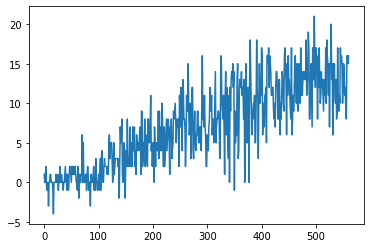


********************************************************

fc1_units:  112 , fc2_units:  104
train_numb:  1 eps_start:  0.991
Episode: 651, elapsed: 0:08:22.829414, Avg.Score: 13.01,  score 15.0, How many scores >= 13: 56, eps.: 0.07
 terminating at episode : 651 ave reward reached +13 over 100 episodes


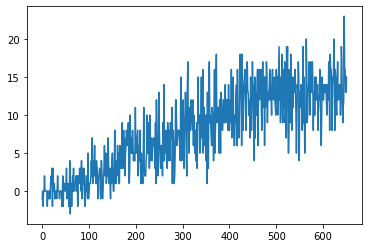


********************************************************

fc1_units:  80 , fc2_units:  80
train_numb:  2 eps_start:  0.991
Episode: 600, elapsed: 0:07:11.168490, Avg.Score: 13.03,  score 17.0, How many scores >= 13: 57, eps.: 0.09
 terminating at episode : 600 ave reward reached +13 over 100 episodes


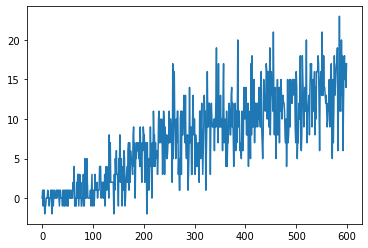


********************************************************

fc1_units:  64 , fc2_units:  56
train_numb:  3 eps_start:  0.991
Episode: 525, elapsed: 0:05:57.416309, Avg.Score: 13.01,  score 13.0, How many scores >= 13: 60, eps.: 0.12
 terminating at episode : 525 ave reward reached +13 over 100 episodes


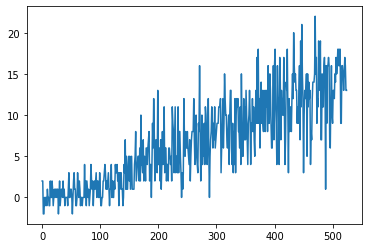


********************************************************

fc1_units:  64 , fc2_units:  56
train_numb:  4 eps_start:  0.988
Episode: 572, elapsed: 0:06:42.641963, Avg.Score: 13.04,  score 14.0, How many scores >= 13: 52, eps.: 0.10
 terminating at episode : 572 ave reward reached +13 over 100 episodes


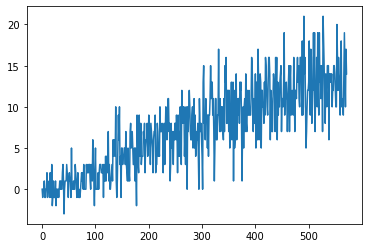


********************************************************



In [11]:
import random

list_fc1_units = []
list_fc2_units = []
list_eps_start = []
list_episodes  = []

numb_of_trains = 5 # 10 
for i in range(0, numb_of_trains):
    #generate random number of nodes
    
    fc1_nodes = random.randrange(48, 128, 16) # possible numbers : 48, 64, 80, 96, 112, 128 ( > 37)
    
    fc2_nodes = random.randrange(fc1_nodes - 16 , fc1_nodes + 16, 8)   # possible numbers  with step 8 

    #randomly initialize epsilon
    epsilon_start = random.randrange(988, 995, 1)/1000.
    
    print('fc1_units: ', fc1_nodes, ', fc2_units: ', fc2_nodes)
    print('train_numb: ', i, 'eps_start: ',epsilon_start)
    agent = Agent(state_size=37, action_size=4, seed=1, fc1_units=fc1_nodes, fc2_units=fc2_nodes)
    scores, episodes = dqn(n_episodes = 2000, eps_start = epsilon_start, train_numb=i)  # train with current params
    list_fc1_units.append(fc1_nodes)
    list_fc2_units.append(fc2_nodes)
    list_eps_start.append(epsilon_start)
    list_episodes.append(episodes)
    plt.plot(scores)
    plt.show()
    print("\n********************************************************\n")


In [16]:
def checkWeights(env, train_n, test, fc1_n, fc2_n, eps_s, episodes):
    agent = Agent(state_size=37, action_size=4, seed=17, fc1_units=fc1_n, fc2_units=fc2_n)  
    file_weights = 'weights_'+str(train_n)+'.trn'
    agent.qnetwork_local.load_state_dict(torch.load(file_weights))

    env_info = env.reset(train_mode=False)[brain_name] # reset the environment
    
    state = env_info.vector_observations[0]            # get the current state
    score = 0                                          # initialize the score
    
    while True:
        action = agent.act(state,.05)                  # select an action
        action = int(action)
        env_info = env.step(action)[brain_name]        # send the action to the environment
        next_state = env_info.vector_observations[0]   # get the next state
        reward = env_info.rewards[0]                   # get the reward
        done = env_info.local_done[0]                  # see if episode has finished
        score += reward                                # update the score
        state = next_state                             # roll over the state to next time step
        if done:                                       # exit loop if episode finished
            break
    
    print('Train: {}, Test: {}, Episode: {}, fc1_units: {}, fc2_units: {}, eps_start: {}, Score: {}'\
          .format(train_n, test, episodes, fc1_n, fc2_n, eps_s, score))
    return score

for i in range(0, numb_of_trains):
    fc1_nodes = list_fc1_units[i]
    fc2_nodes = list_fc2_units[i]
    eps_start = list_eps_start[i]
    episodes  = list_episodes[i]
    list_scores = []
    for test in range(0,6):        
        score = checkWeights(env=env, train_n=i, test=test, fc1_n=fc1_nodes, fc2_n=fc2_nodes, eps_s=eps_start,episodes=episodes)
        list_scores.append(score)
    avg_score =  np.mean(list_scores)
    print('       Average Score: ', avg_score)
    print('=========================================================')

Train: 0, Test: 0, Episode: 561, fc1_units: 48, fc2_units: 56, eps_start: 0.993, Score: 17.0
Train: 0, Test: 1, Episode: 561, fc1_units: 48, fc2_units: 56, eps_start: 0.993, Score: 14.0
Train: 0, Test: 2, Episode: 561, fc1_units: 48, fc2_units: 56, eps_start: 0.993, Score: 12.0
Train: 0, Test: 3, Episode: 561, fc1_units: 48, fc2_units: 56, eps_start: 0.993, Score: 9.0
Train: 0, Test: 4, Episode: 561, fc1_units: 48, fc2_units: 56, eps_start: 0.993, Score: 15.0
Train: 0, Test: 5, Episode: 561, fc1_units: 48, fc2_units: 56, eps_start: 0.993, Score: 20.0
       Average Score:  14.5
Train: 1, Test: 0, Episode: 651, fc1_units: 112, fc2_units: 104, eps_start: 0.991, Score: 11.0
Train: 1, Test: 1, Episode: 651, fc1_units: 112, fc2_units: 104, eps_start: 0.991, Score: 11.0
Train: 1, Test: 2, Episode: 651, fc1_units: 112, fc2_units: 104, eps_start: 0.991, Score: 19.0
Train: 1, Test: 3, Episode: 651, fc1_units: 112, fc2_units: 104, eps_start: 0.991, Score: 13.0
Train: 1, Test: 4, Episode: 651, fc

In [17]:
env.close()